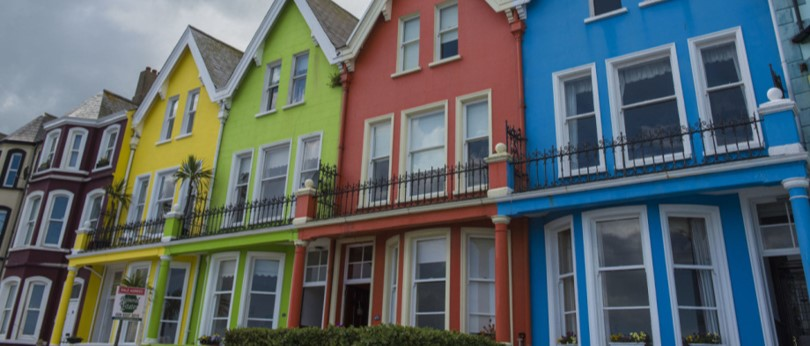

This publication aims to present an introdutory analysis to Predict Houses Price Sales. Using a broadly spread dataset in data community, with 79 explanatory variables and 1460 rows, that describe a huge amount characteristics of residential homes in the Unites States. 

As a begginer, in my studies I have chosen following the steps below: 

**1 - Importing the required libraries into Python.**

**2 - Importing house price data sets.**

**3 - Data Cleaning and Wrangling:** 

a. Identifying and handling missing values;

b. Correcting data format;

**4 - Exploratory Analysis and Data Visualization.**

**5 - Primary Predict Model using Linear Regression.**

a. Simple Linear Regression

b. Multiple Linear Regression

**6 - Final conclusions and next studies suggestions.**


**1 - Importing the required libraries into Python.** 

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing

# import the visualization package
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import pylab as plot

# Algorithms
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

**2 - Importing house price datasets.**

In [26]:
#read the csv file
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**3 - Data Cleaning and Wrangling:**

***3.a. Identifying and handling missing values:***

In this step of the solution I am going to use two features. The first one is the Describe Method Transposed that it will provide an initial overview of the numeric variables situation. With this method it is possible to analyse primary statistical information, such as: mean, standard deviation, minimum and maximum values.
For a deeper analysis let's use the function 'dt_analysis' that creates a dataframe showing the null values percentage. 

In [27]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [28]:
def dt_analysis(df): 
    """This function crates a data frame with the columns: 'Type', 'Counts',
    'Nulls_values', 'nulls_perc', 'distincts','Corr_Coef"""    
    types = df.dtypes 
    corr = df.corr()['SalePrice']
    counts = df.apply(lambda a: a.count())
    nulls = df.apply(lambda a: a.isnull().sum())
    nulls_perc = nulls/(counts+nulls)*100
    distincts = df.apply(lambda a: a.unique().shape[0])
  
    str = pd.concat([types, counts,nulls,  nulls_perc, distincts, corr], axis = 1, sort=False)
    str.columns = ['Type', 'Counts', 'Nulls_values', 'nulls_perc', 'distincts','Corr_Coef']
  
       
    return str

In [29]:
train_analitics = dt_analysis(train)
train_null = train_analitics.sort_values('Nulls_values', ascending = False).head(20)
train_null

,Type,Counts,Nulls_values,nulls_perc,distincts,Corr_Coef
PoolQC,object,7,1453,99.520548,4,NaN
MiscFeature,object,54,1406,96.301370,5,NaN
Alley,object,91,1369,93.767123,3,NaN
Fence,object,281,1179,80.753425,5,NaN
FireplaceQu,object,770,690,47.260274,6,NaN
LotFrontage,float64,1201,259,17.739726,111,0.351799
GarageYrBlt,float64,1379,81,5.547945,98,0.486362
GarageCond,object,1379,81,5.547945,6,NaN
GarageType,object,1379,81,5.547945,7,NaN
GarageFinish,object,1379,81,5.547945,4,NaN


Initially,due to the missing values, percentage is over 45 percent, the following columns will be dropped: 'PoolQC', 'MiscFeature', 'Alley and Fence'.

In [30]:
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu' ], axis = 1, inplace = True)


Once 'LotFrontage' and 'MasUrArea' are numeric variables, the missing values will be substituted by mean values.

Note that, 'GarageYrBlt' it is a float type variable, however the information is about the construction year. For this reason it makes no sense substitute it for mean values.

In [31]:
data = [train]
columns = ['LotFrontage', 'MasVnrArea']

for dt in data:
    for c in columns:
        
        mean = dt[c].mean()
        std = dt[c].std() #standard deviation
        null = dt[c].isnull().sum()

        randon = np.random.randint(mean - std, mean + std, size = null)

        age_copy = dt[c].copy()
        is_null = np.isnan(age_copy)
        age_copy[is_null] = randon
        
        dt[c] = age_copy

Let's drop the missing values in the variables that remain, once they are categorical and represent a small null values percentage. 

In [32]:
garage = ['GarageType', 'GarageCond', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCars', 'GarageArea']
object_values = ['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtQual','BsmtCond','MasVnrType','Electrical']

for c in garage:
    train.dropna(inplace=True, subset = [c])
     
for c in object_values:
    train.dropna(inplace=True, subset = [c])
    

After data claning and wrangling we reduced in 10 percent the data set length, as it can be seen in the following.

In [33]:
train_analitics = dt_analysis(train)
train_null = train_analitics.sort_values('Nulls_values', ascending = False).head(50)
train_null.head()

,Type,Counts,Nulls_values,nulls_perc,distincts,Corr_Coef
Id,int64,1338,0,0.0,1338,-0.030473
FullBath,int64,1338,0,0.0,4,0.569313
Fireplaces,int64,1338,0,0.0,4,0.445434
Functional,object,1338,0,0.0,7,NaN
TotRmsAbvGrd,int64,1338,0,0.0,10,0.551821


**3.b. Correcting data format:** 

It is possible to see in the data_description that 'MSSubClass' represents the kind habitation places invoved in negociation, so it is necessary to transform it to object. Other columns, like 'OverallQual', refers to overal material quality used in contruction. However, it is presumed that the prices increase when the material quality rises, so lets use it as a float.

In [34]:
data = [train]
for d in data:
    d['MSSubClass'] = d['MSSubClass'].astype(str)

**4 - Explorattory Analysis and Data Visualization.**

One way to analyse a correlation between two variables is using Pearson Correlation. Where, if the Pearson Correlation is close to 1 it means that the two variables have strong positive correlation. Similarly, if the correlation coeficient is close to negative 1, it means a negative correlation and if it is close to zero, it means that there is no correlation.

To make the analysis more complete, it is possible to analyse whether the sample is statistically significant using P-value. 
How much closer to zero the P-value is, it means that the sample is statisticaly significant.

Let's analayse numerically and grafically the relationship.


Two variables to start analysing correlation can be 'MSSubClass' and 'OveralQual'.Before calculating Pearson Correlation and P-value let's graphically see the behavior of this two variables with Sales Price.



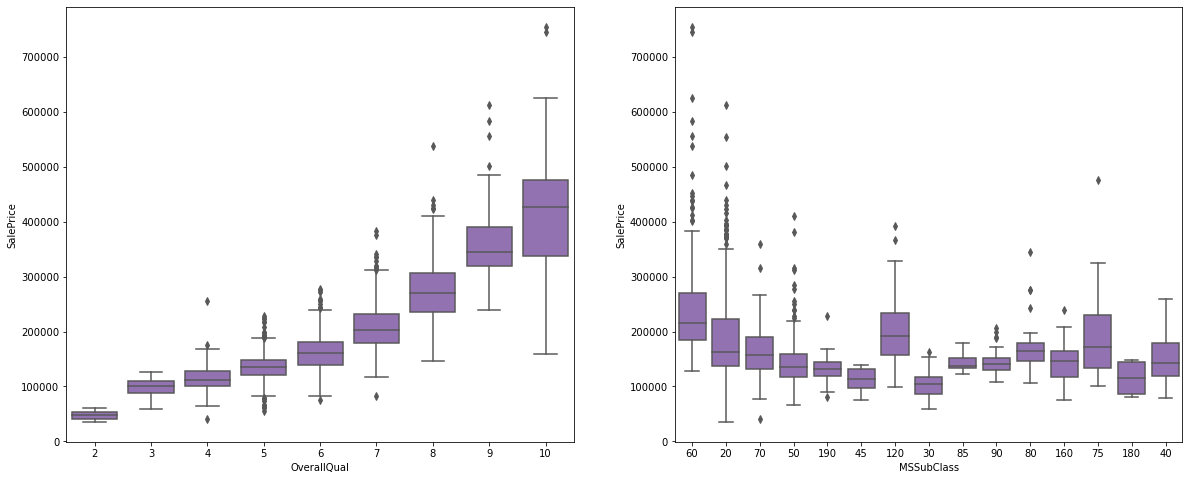

In [35]:
figure, ax = plt.subplots(1,2, figsize = (20,8))
select_color = sns.color_palette()[4]
sns.boxplot(data=train, x = 'OverallQual', y='SalePrice', ax = ax[0], color = select_color) 
sns.boxplot(data=train, x = 'MSSubClass', y='SalePrice', ax = ax[1], color = select_color)

plt.show()

As said above 'MSSubClass' is related to the type of dwelling involved in the sale. It can be clearly seen graphically, that a numeric analysis makes no sense. On the other hand, it is reasonable to analyse the overall material quality as a numeric variable.

MSSubClass: Identifies the type of dwelling involved in the sale.

        20 - 1-STORY 1946 & NEWER ALL STYLES
        30 - 1-STORY 1945 & OLDER
        40 - 1-STORY W/FINISHED ATTIC ALL AGES
        45 - 1-1/2 STORY - UNFINISHED ALL AGES
        50 - 1-1/2 STORY FINISHED ALL AGES
        60 - 2-STORY 1946 & NEWER
        70 - 2-STORY 1945 & OLDER
        75 - 2-1/2 STORY ALL AGES
        80 - SPLIT OR MULTI-LEVEL
        85 - SPLIT FOYER
        90 - DUPLEX - ALL STYLES AND AGES
       120 - 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150 - 1-1/2 STORY PUD - ALL AGES
       160 - 2-STORY PUD - 1946 & NEWER
       180 - PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190 - 2 FAMILY CONVERSION - ALL STYLES AND AGES

In the sequence, we can observe the graphical behavior of numeric variables with the price.

The Pearson Correlation Coefficient is: 0.7835456113843178 with a P-value of P = 2.1247055885753247e-278


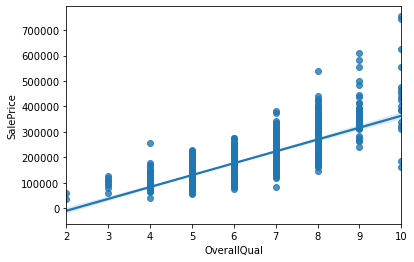

In [36]:
pearson_coef, p_value = stats.pearsonr(train['OverallQual'], train['SalePrice'])
print('The Pearson Correlation Coefficient is:' , pearson_coef , 'with a P-value of P =' , p_value)
sns.regplot(x = 'OverallQual', y='SalePrice', data = train)
plt.show()

The Pearson Correlation Coefficient is: 0.7117061511024301 with a P-value of P = 3.8644146608074796e-207


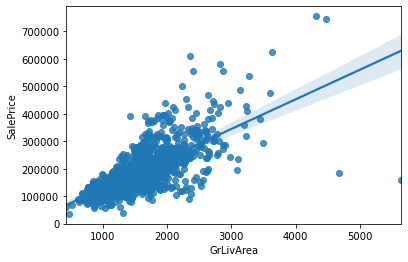

In [37]:
pearson_coef, p_value = stats.pearsonr(train['GrLivArea'], train['SalePrice'])
print('The Pearson Correlation Coefficient is:' , pearson_coef , 'with a P-value of P =' , p_value)
sns.regplot(x = 'GrLivArea', y='SalePrice', data = train)
plt.show()

The Pearson Correlation Coefficient is: -0.1273852765420978 with a P-value of P = 2.9497989573984244e-06


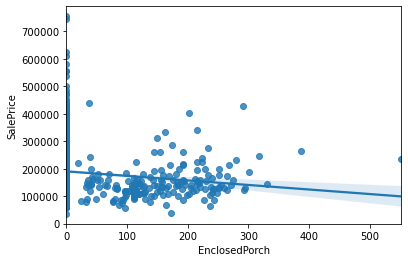

In [38]:
pearson_coef, p_value = stats.pearsonr(train['EnclosedPorch'], train['SalePrice'])
print('The Pearson Correlation Coefficient is:' , pearson_coef , 'with a P-value of P =' , p_value)
sns.regplot(x = 'EnclosedPorch', y='SalePrice', data = train)
plt.show()

The Pearson Correlation Coefficient is: 0.6401543580531923 with a P-value of P = 3.6379131965161776e-155


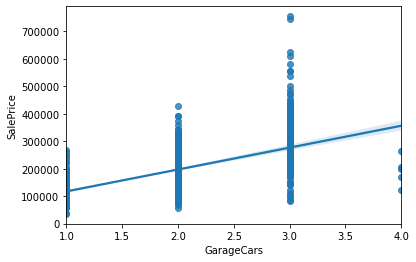

In [39]:
pearson_coef, p_value = stats.pearsonr(train['GarageCars'], train['SalePrice'])
print('The Pearson Correlation Coefficient is:' , pearson_coef , 'with a P-value of P =' , p_value)
sns.regplot(x = 'GarageCars', y='SalePrice', data = train)
plt.show()

Even though graphically it is possible to analyse correlation between two variables, we do not want to do it one by one. For a further systematic analysis, let's use the 'corr()' function in cooperation with a heat map.

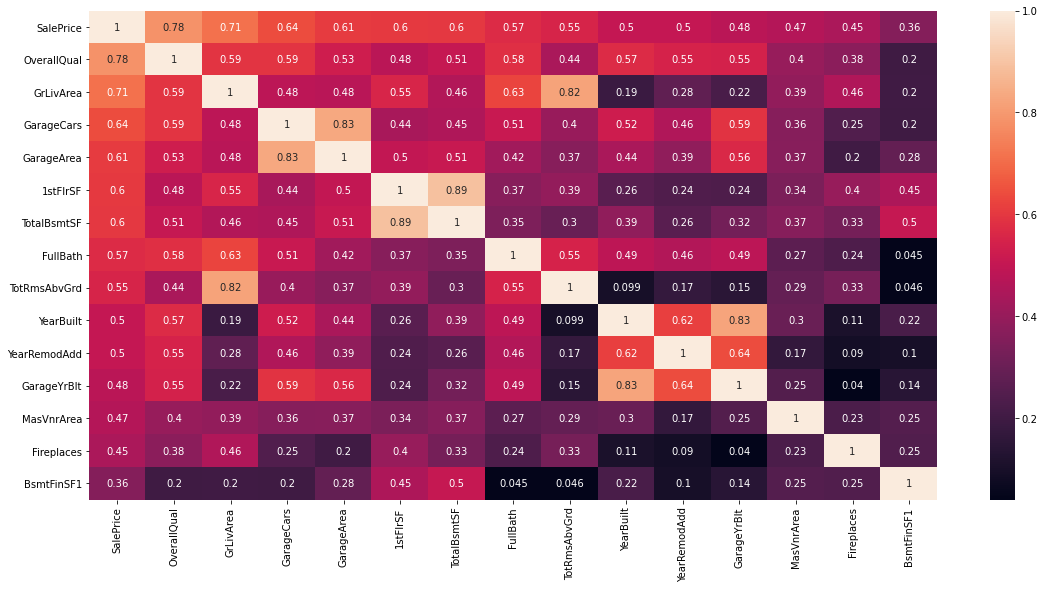

In [40]:
train_analitic = train_analitics.sort_values('Corr_Coef', ascending = False).head(15)
tp = train_analitic.index.values

n = train[tp]

plt.figure(figsize=(19, 9))
sns.heatmap(n.corr(), annot = True)

plt.show()

When a variable is categorical, it means that it owns an information not a number. So it is possible to analyse in a different way. For instance, what is the sale price impact if the house is in a different neighborhood? 
To answer that let's analyse using the 'group by()' method and graphically analyse the impact.

<AxesSubplot:xlabel='Neighborhood'>

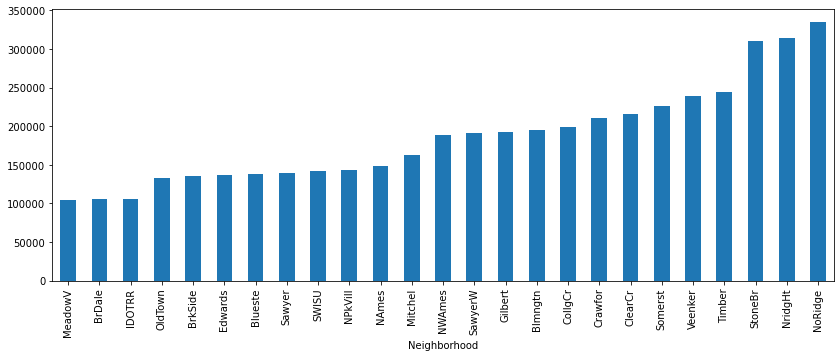

In [41]:
Nb = train.groupby('Neighborhood').agg('mean').sort_values("SalePrice")['SalePrice']
Nb.plot(kind='bar', figsize=(14, 5),stacked=False)

**5 - Primary Predict Model using Liner Regression.**



**Simple Linear Regression:**

By using only one independent variable, usually X axis, the model tries to predict the value of an independent variable.

To evaluate the method, let's use R-square method and Mean Square Error.

R-squared, also known as the coefficient of determination, is a measure to indicate 
how close the data is to the fitted regression line. The value of the R-squared is 
the percentage of variation of the response variable (y) that is explained by a linear model. Mean Square Error measures the average squared difference between the estimated values and the actual value.

In [42]:
# Calling the function
lm = LinearRegression()

In [43]:
# Identifying the variables 
X = train[['OverallQual']]
Y = train[['SalePrice']]

In [44]:
# Fitting the variables into the function
lm.fit(X,Y)

LinearRegression()

In [45]:
# Predicting values
Yhat=lm.predict(X)

In [46]:
# Evaluating the model
print('The R-square is: ', lm.score(X, Y))
mse = mean_squared_error(train['SalePrice'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The R-square is:  0.6139437251196244
The mean square error of price and predicted value is:  2402328247.490845


Using Linear Regression and the dependent variable 'OverallQual' make it possible to predict Sale Price around 61%. 

Let's try with another variable: 'GrLivArea'

In [47]:
X = train[['GrLivArea']]
Y = train[['SalePrice']]

In [48]:
lm.fit(X,Y)

LinearRegression()

In [49]:
Yhat=lm.predict(X)

In [50]:
# Find the R^2
print('The R-square is: ', lm.score(X, Y))
mse = mean_squared_error(train['SalePrice'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The R-square is:  0.506525645517035
The mean square error of price and predicted value is:  3070763146.005269


By changing the variable from Overal Quality to Garage Living area the R-square reduced to 50%. 

Let's use a method a litle bit more complex to try to predict the house Sale Prices. 

**Multiple Linear Regression:**

Instead of using just one independent variable, this method uses two or more variables.

In [51]:
# Calling the function
lm = LinearRegression()

In [52]:
# Identifying the variables
new_df = train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 
                'FullBath', 'TotRmsAbvGrd', 'YearBuilt','YearRemodAdd']]
target = train['SalePrice']


In [53]:
# Fitting the variables into the function
lm.fit(new_df,target)

LinearRegression()

In [54]:
# Predicting values
mv_prediction = lm.predict(new_df)

In [55]:
lm1 = lm.fit(new_df, target)
# Find the R^2
print('The R-square is: ', lm1.score(new_df, target))
mse = mean_squared_error(train['SalePrice'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The R-square is:  0.765837969406399
The mean square error of price and predicted value is:  3070763146.005269


It is possbile to see that using ten numeric dependent variables (new_df) the R-squared improved a litlle more when compared to simple linear regression. The R-square value of 76% indicates how close the data is to the fitted regression line, which is possilbe to analyse on the graph below.  

C:\Users\Orlando\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Orlando\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


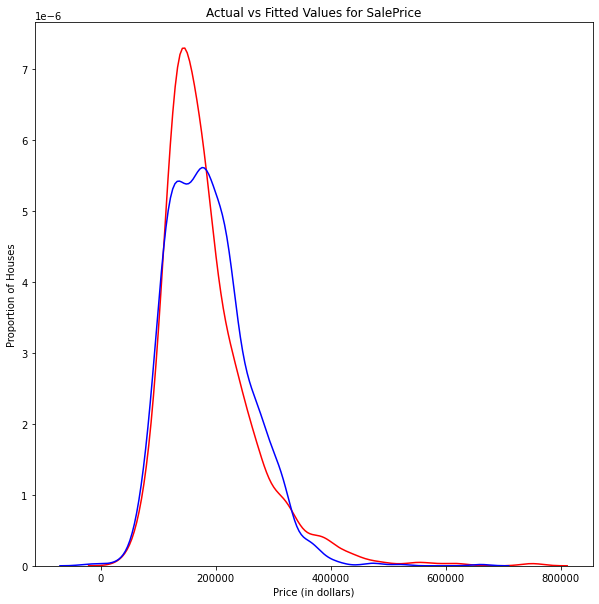

In [56]:
# Evaluating the model
width = 10
height = 10
plt.figure(figsize=(width, height))

ax1 =sns.distplot(train['SalePrice'], hist=False, color="r", label="Actual Value")
sns.distplot(mv_prediction, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for SalePrice')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')

plt.show()
plt.close()

**6 - Final conclusions and next studies suggestions.**

As an Introductory analysis, this study focused on presenting some techniques to analyze the data set. As it can be seen, there are some variables that have a strong correlation with sale price variation, such as the material quality and the garage area. Analyzing the two methods used, multiple linear regression showed a better R-square value.

There are some lacks on this study, such as: only consider numeric variables on the predict model.

For further studies I suggest to use:

a - Data Standardization and Normalization.

b - Transform categorical variables to numeric by using dummies function.

c - Apply more statistics analysis, like: Multicollinearity Analysis, Check the Outliers.
